## <center>Imports</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df=pd.DataFrame(pd.read_csv(r"E:\DEP\telcp\telecom_churn.csv"))

In [3]:
df.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

## <center>Feature Engineering and Visualization</center>

In [8]:
df['TotalDataCost'] = df['DataPlan'] + df['MonthlyCharge']
df['Average Data Consumption'] = (df['DataPlan']+df['DataUsage'])/2
pca = PCA(n_components=1)
df['combined_data'] = pca.fit_transform(df[['TotalDataCost', 'Average Data Consumption']])
df.drop(['TotalDataCost','Average Data Consumption','DataPlan','MonthlyCharge','DataUsage'],axis=1,inplace=True)

In [9]:
df.corr()

Churn  AccountWeeks  ContractRenewal  CustServCalls  \
Churn            1.000000      0.016541        -0.259852       0.208750   
AccountWeeks     0.016541      1.000000        -0.024735      -0.003796   
ContractRenewal -0.259852     -0.024735         1.000000       0.024522   
CustServCalls    0.208750     -0.003796         0.024522       1.000000   
DayMins          0.205151      0.006216        -0.049396      -0.013423   
DayCalls         0.018459      0.038470        -0.003755      -0.018942   
OverageFee       0.092812     -0.006749        -0.019105      -0.012964   
RoamMins         0.068239      0.009514        -0.045871      -0.009640   
combined_data    0.067854      0.012412        -0.046471      -0.027934   

                  DayMins  DayCalls  OverageFee  RoamMins  combined_data  
Churn            0.205151  0.018459    0.092812  0.068239       0.067854  
AccountWeeks     0.006216  0.038470   -0.006749  0.009514       0.012412  
ContractRenewal -0.049396 -0.003755   -0.019105 -0.045871      -0.046471  
CustServCalls   -0.013423 -0.018942   -0.012964 -0.009640      -0.027934  
DayMins          1.000000  0.006750    0.007038 -0.010155       0.555759  
DayCalls         0.006750  1.000000   -0.021449  0.021565      -0.008106  
OverageFee       0.007038 -0.021449    1.000000 -0.011023       0.276345  
RoamMins        -0.010155  0.021565   -0.011023  1.000000       0.115128  
combined_data    0.555759 -0.008106    0.276345  0.115128       1.000000

<Axes: xlabel='Churn', ylabel='AccountWeeks'>

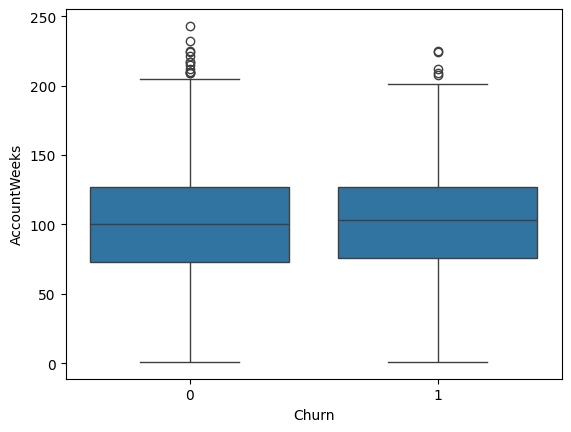

In [10]:
sns.boxplot(x=df['Churn'], y=df['AccountWeeks'])

<Axes: xlabel='Churn', ylabel='CustServCalls'>

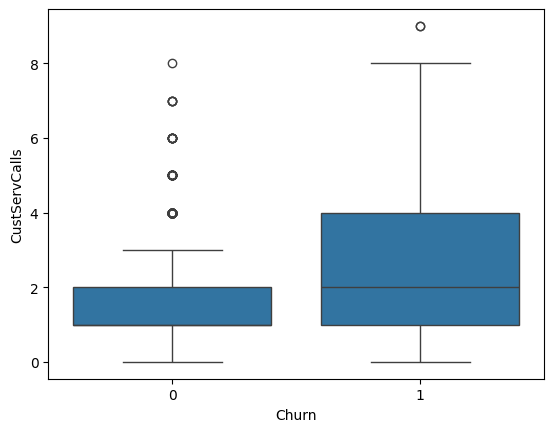

In [11]:
sns.boxplot(x=df['Churn'], y=df['CustServCalls'])

<Axes: xlabel='Churn', ylabel='DayMins'>

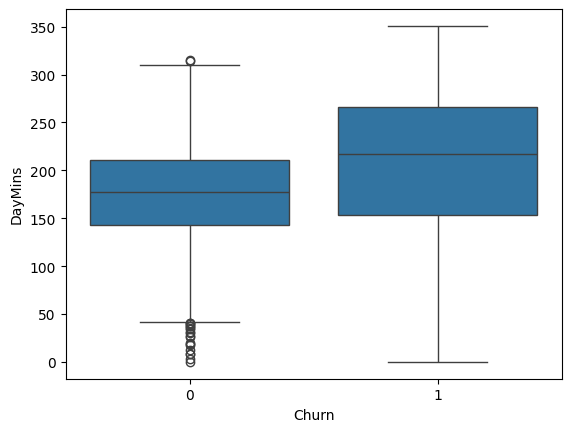

In [12]:
sns.boxplot(x=df['Churn'], y=df['DayMins'])

<Axes: xlabel='Churn', ylabel='DayCalls'>

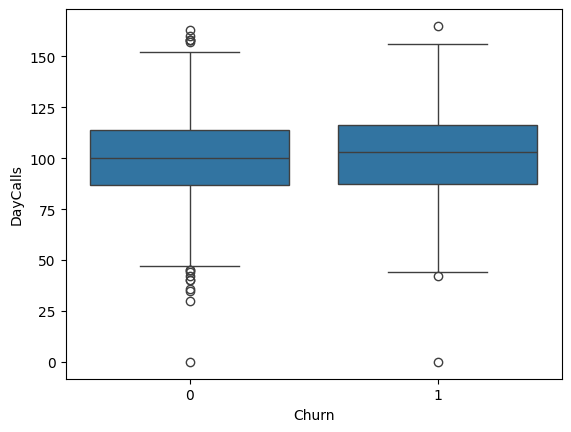

In [13]:
sns.boxplot(x=df['Churn'], y=df['DayCalls'])

<Axes: xlabel='Churn', ylabel='OverageFee'>

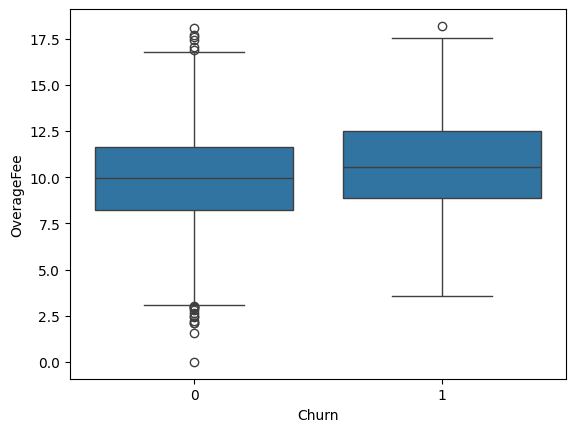

In [14]:
sns.boxplot(x=df['Churn'], y=df['OverageFee'])

<Axes: xlabel='Churn', ylabel='RoamMins'>

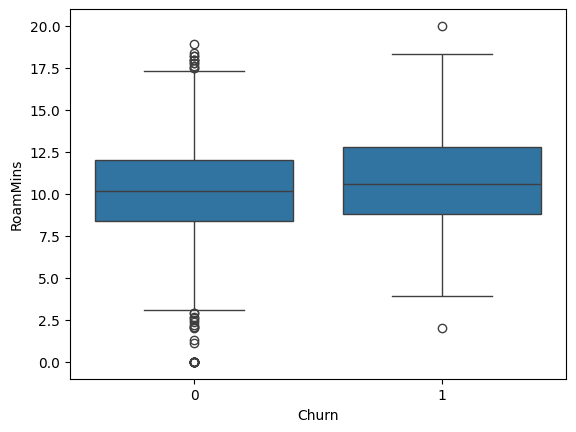

In [15]:
sns.boxplot(x=df['Churn'], y=df['RoamMins'])

<Axes: xlabel='Churn', ylabel='combined_data'>

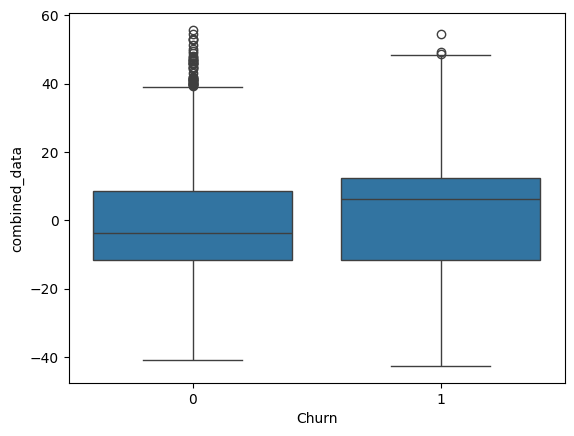

In [16]:
sns.boxplot(x=df['Churn'], y=df['combined_data'])

## <center>Model Training</center>

In [17]:
x = df.drop('Churn', axis=1)  # Features
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
d = {"Decision Tree Classifier": DecisionTreeClassifier(),
     "Random Forest Classifier": RandomForestClassifier(),
     "GradientBoosting Classifier": GradientBoostingClassifier()}
m_name=[]
acc_score=[]
for model_name, model in d.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    m_name.append(model_name)
    acc_score.append((cross_val_score(model, X_train, y_train, cv=10)).mean()*100)
results = dict(zip(m_name, acc_score))
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")

Decision Tree Classifier: 88.37
Random Forest Classifier: 93.55
GradientBoosting Classifier: 93.92


## <center>Results</center>

Random Forest Classifier and GradientBoosting Classifier both exhibit excellent performance, with accuracies around 93-94%.
Decision Tree Classifier performs well, but not as well as the other two models.